In [82]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F
import xgboost as xgb
from pathlib import Path

from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType
import importlib
import utils.data_processing_snapshot_feature_label as snapshot_module
import src.models.xgb as models
importlib.reload(snapshot_module)
importlib.reload(models)

import utils.data_processing_bronze_table
import utils.data_processing_silver_table
import utils.data_processing_gold_table
from utils.data_processing_snapshot_feature_label import gold_features_labels_snapshot_creation, train_test_OOT_simulation_months
from src.models.xgb import feature_label_XGB_training, feature_label_XGB_get_X_y, optuna_mlflow_hyperparamter_tuning_xgb, shap_explainer_feature_set_generator




In [6]:
from datetime import datetime
datetime.now().strftime("%Y%m%d_%H%M")

'20251029_1707'

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 368, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 466, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 1636, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 1629, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

Data has 72 numeric cols and 0 cat cols.


[I 2025-10-29 12:19:54,037] A new study created in memory with name: 20251029_1219_5_fold


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:01,466] Trial 0 finished with value: 0.7936467493796935 and parameters: {'learning_rate': 0.010853898504265857, 'max_depth': 9, 'gamma': 2.4772429274679926, 'subsample': 0.6372365258740573, 'colsample_bytree': 0.8769413275548227, 'reg_alpha': 1.593004499996051e-06, 'reg_lambda': 0.16733961748264467}. Best is trial 0 with value: 0.7936467493796935.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:03,942] Trial 1 finished with value: 0.8021750107783084 and parameters: {'learning_rate': 0.03297786776419721, 'max_depth': 5, 'gamma': 4.014687619698931, 'subsample': 0.6488099937655458, 'colsample_bytree': 0.8239324536960034, 'reg_alpha': 2.2015488062411603e-06, 'reg_lambda': 2.5817613718954124}. Best is trial 1 with value: 0.8021750107783084.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:06,253] Trial 2 finished with value: 0.8041516982681604 and parameters: {'learning_rate': 0.052650897889764924, 'max_depth': 4, 'gamma': 4.332052226780114, 'subsample': 0.9928751366556957, 'colsample_bytree': 0.9535571366130962, 'reg_alpha': 3.014889227240635e-05, 'reg_lambda': 1.0684736365428294e-06}. Best is trial 2 with value: 0.8041516982681604.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:09,183] Trial 3 finished with value: 0.8011088705487326 and parameters: {'learning_rate': 0.05951936484391004, 'max_depth': 7, 'gamma': 3.043818416404254, 'subsample': 0.5086404564974967, 'colsample_bytree': 0.850359896288775, 'reg_alpha': 4.132408814243494e-06, 'reg_lambda': 1.4387400142359121}. Best is trial 2 with value: 0.8041516982681604.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:11,710] Trial 4 finished with value: 0.7753504390060444 and parameters: {'learning_rate': 0.274541330018323, 'max_depth': 10, 'gamma': 4.219246952684072, 'subsample': 0.6696039560926161, 'colsample_bytree': 0.6424532595659274, 'reg_alpha': 0.785058170106718, 'reg_lambda': 1.2803261738646337e-05}. Best is trial 2 with value: 0.8041516982681604.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:14,093] Trial 5 finished with value: 0.7929797801724826 and parameters: {'learning_rate': 0.030839905390632985, 'max_depth': 6, 'gamma': 0.7853854308186287, 'subsample': 0.51603095181262, 'colsample_bytree': 0.8328731036361465, 'reg_alpha': 9.282145525109549, 'reg_lambda': 0.20170991235628596}. Best is trial 2 with value: 0.8041516982681604.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:18,809] Trial 6 finished with value: 0.797630763741167 and parameters: {'learning_rate': 0.013407451975647943, 'max_depth': 9, 'gamma': 4.3754551690455985, 'subsample': 0.6838173084869135, 'colsample_bytree': 0.8937888781574126, 'reg_alpha': 0.20550182958248916, 'reg_lambda': 0.0005890556828154768}. Best is trial 2 with value: 0.8041516982681604.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:21,271] Trial 7 finished with value: 0.7993582128642598 and parameters: {'learning_rate': 0.017906794719734692, 'max_depth': 5, 'gamma': 3.751463597983307, 'subsample': 0.8074941582017405, 'colsample_bytree': 0.8706779645209533, 'reg_alpha': 0.2974385634717982, 'reg_lambda': 0.7256927794230136}. Best is trial 2 with value: 0.8041516982681604.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:26,701] Trial 8 finished with value: 0.7925323941203738 and parameters: {'learning_rate': 0.02315817127473198, 'max_depth': 10, 'gamma': 1.0270835433751468, 'subsample': 0.6989153226138729, 'colsample_bytree': 0.9422761768875162, 'reg_alpha': 0.00400701351165525, 'reg_lambda': 8.21316487310821}. Best is trial 2 with value: 0.8041516982681604.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:31,385] Trial 9 finished with value: 0.7962096413998438 and parameters: {'learning_rate': 0.012454977640023583, 'max_depth': 9, 'gamma': 4.652122333428613, 'subsample': 0.5789369661942639, 'colsample_bytree': 0.7448581112488593, 'reg_alpha': 0.049596547370704416, 'reg_lambda': 0.009738711553198732}. Best is trial 2 with value: 0.8041516982681604.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:33,984] Trial 10 finished with value: 0.8055811177270458 and parameters: {'learning_rate': 0.09530907677220428, 'max_depth': 3, 'gamma': 2.0266545323154688, 'subsample': 0.9753681760854668, 'colsample_bytree': 0.9874793016808562, 'reg_alpha': 9.389912639813189e-05, 'reg_lambda': 4.375674503921728e-06}. Best is trial 10 with value: 0.8055811177270458.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:36,401] Trial 11 finished with value: 0.8049075572856454 and parameters: {'learning_rate': 0.09334587779930051, 'max_depth': 3, 'gamma': 1.9670077883461887, 'subsample': 0.9943659682002536, 'colsample_bytree': 0.9875276651609076, 'reg_alpha': 0.00019734652150048835, 'reg_lambda': 1.0440863496607041e-06}. Best is trial 10 with value: 0.8055811177270458.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:40,003] Trial 12 finished with value: 0.8041112936992812 and parameters: {'learning_rate': 0.13601465061702978, 'max_depth': 3, 'gamma': 1.855761324670907, 'subsample': 0.9993112918708447, 'colsample_bytree': 0.9953044037306454, 'reg_alpha': 5.4909123765189654e-08, 'reg_lambda': 3.6546406621161254e-05}. Best is trial 10 with value: 0.8055811177270458.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:44,392] Trial 13 finished with value: 0.8074336912155674 and parameters: {'learning_rate': 0.11001238061004331, 'max_depth': 3, 'gamma': 1.739943673675376, 'subsample': 0.8800864575639922, 'colsample_bytree': 0.5013210867658342, 'reg_alpha': 0.0013247965417222598, 'reg_lambda': 1.2364805146851734e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:48,419] Trial 14 finished with value: 0.8002206517663553 and parameters: {'learning_rate': 0.18724642939530153, 'max_depth': 3, 'gamma': 1.407046203852747, 'subsample': 0.883655137435566, 'colsample_bytree': 0.5334344486657518, 'reg_alpha': 0.003417450753396865, 'reg_lambda': 3.5033691035214383e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:51,445] Trial 15 finished with value: 0.8051855204605538 and parameters: {'learning_rate': 0.09355228048645088, 'max_depth': 4, 'gamma': 0.3163976960125934, 'subsample': 0.9054074017298748, 'colsample_bytree': 0.5250468060299673, 'reg_alpha': 0.0015674910739148866, 'reg_lambda': 0.00044932184294444675}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:55,090] Trial 16 finished with value: 0.7992772817176693 and parameters: {'learning_rate': 0.07562137047471292, 'max_depth': 7, 'gamma': 3.116304079411716, 'subsample': 0.9033130863676337, 'colsample_bytree': 0.6923884267198948, 'reg_alpha': 0.00010600561443038445, 'reg_lambda': 6.454928404761922e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:20:58,302] Trial 17 finished with value: 0.7907848125060294 and parameters: {'learning_rate': 0.16710789293397404, 'max_depth': 4, 'gamma': 2.42880625668789, 'subsample': 0.8020764418998716, 'colsample_bytree': 0.5751319652230895, 'reg_alpha': 1.6102240969449363e-08, 'reg_lambda': 0.0002969275017164942}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:01,882] Trial 18 finished with value: 0.7964604984515735 and parameters: {'learning_rate': 0.12590620097883107, 'max_depth': 5, 'gamma': 1.6869044509715843, 'subsample': 0.8541167252821501, 'colsample_bytree': 0.7685680401147115, 'reg_alpha': 0.016961654282471688, 'reg_lambda': 0.00322659472606273}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:05,900] Trial 19 finished with value: 0.8056566296480152 and parameters: {'learning_rate': 0.04707597035033082, 'max_depth': 6, 'gamma': 3.199585680767492, 'subsample': 0.9232958114350742, 'colsample_bytree': 0.617357354560224, 'reg_alpha': 2.066193250292295e-05, 'reg_lambda': 4.777017541870486e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:10,957] Trial 20 finished with value: 0.8026706580442957 and parameters: {'learning_rate': 0.05092620840132589, 'max_depth': 8, 'gamma': 3.2889462131725775, 'subsample': 0.7598057476282892, 'colsample_bytree': 0.6053544288989452, 'reg_alpha': 2.0927227591528857e-07, 'reg_lambda': 0.00011661442630032113}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:15,077] Trial 21 finished with value: 0.8042833792296783 and parameters: {'learning_rate': 0.03847957246918945, 'max_depth': 6, 'gamma': 2.691402528254374, 'subsample': 0.9444840615308772, 'colsample_bytree': 0.502369458124506, 'reg_alpha': 2.0292344896408594e-05, 'reg_lambda': 3.507267062020033e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:18,204] Trial 22 finished with value: 0.8074254326996698 and parameters: {'learning_rate': 0.0748616745447453, 'max_depth': 4, 'gamma': 2.1732348558465366, 'subsample': 0.9342556604581957, 'colsample_bytree': 0.6523071553741198, 'reg_alpha': 0.0007549128713839805, 'reg_lambda': 5.231507710269554e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:21,628] Trial 23 finished with value: 0.8073590809191868 and parameters: {'learning_rate': 0.07112355374488066, 'max_depth': 4, 'gamma': 3.520985830525982, 'subsample': 0.9329822188256973, 'colsample_bytree': 0.6633249904685314, 'reg_alpha': 0.0011457048295857037, 'reg_lambda': 2.9245337441766436e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:24,446] Trial 24 finished with value: 0.8053987319284328 and parameters: {'learning_rate': 0.0763259615002275, 'max_depth': 4, 'gamma': 4.9680870178379255, 'subsample': 0.8503752924048725, 'colsample_bytree': 0.6776754986327903, 'reg_alpha': 0.0009010755006398788, 'reg_lambda': 3.229711609850837e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:27,866] Trial 25 finished with value: 0.8048904221102336 and parameters: {'learning_rate': 0.07037476685349198, 'max_depth': 5, 'gamma': 3.6628889066456836, 'subsample': 0.9547231113492571, 'colsample_bytree': 0.7217247538072732, 'reg_alpha': 0.019434593422030747, 'reg_lambda': 0.004448329170099941}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:31,109] Trial 26 finished with value: 0.7974224319372525 and parameters: {'learning_rate': 0.12648220531683382, 'max_depth': 4, 'gamma': 1.2826606040324935, 'subsample': 0.8485010369489894, 'colsample_bytree': 0.5759163729517407, 'reg_alpha': 0.0009567577466667407, 'reg_lambda': 9.096915397242569e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:35,813] Trial 27 finished with value: 0.7938734087023936 and parameters: {'learning_rate': 0.27716654179224687, 'max_depth': 3, 'gamma': 2.7178065036645727, 'subsample': 0.7992185487768984, 'colsample_bytree': 0.6529438008864146, 'reg_alpha': 0.00036587019428984454, 'reg_lambda': 1.713982341966687e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:40,648] Trial 28 finished with value: 0.7966179723903664 and parameters: {'learning_rate': 0.17352900173973193, 'max_depth': 4, 'gamma': 2.180011148170333, 'subsample': 0.9399350783375501, 'colsample_bytree': 0.7816105719774538, 'reg_alpha': 0.007223880178797867, 'reg_lambda': 1.5461492162086916e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:43,044] Trial 29 finished with value: 0.798741111492877 and parameters: {'learning_rate': 0.10042752745568026, 'max_depth': 5, 'gamma': 0.023929791371580578, 'subsample': 0.872935807359288, 'colsample_bytree': 0.5711385515007172, 'reg_alpha': 0.07140586480185894, 'reg_lambda': 0.0014552713757449783}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:44,941] Trial 30 finished with value: 0.7959447238642003 and parameters: {'learning_rate': 0.21195113435742985, 'max_depth': 3, 'gamma': 2.337744939855709, 'subsample': 0.781183333210566, 'colsample_bytree': 0.6995554807799498, 'reg_alpha': 0.0004113640417783958, 'reg_lambda': 0.018658080126697073}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:47,379] Trial 31 finished with value: 0.8046247101385514 and parameters: {'learning_rate': 0.038015030597165704, 'max_depth': 6, 'gamma': 3.4195933804691436, 'subsample': 0.9095078529663584, 'colsample_bytree': 0.6211947142156056, 'reg_alpha': 1.1484921829363682e-05, 'reg_lambda': 7.479002660491658e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:50,878] Trial 32 finished with value: 0.804337094479607 and parameters: {'learning_rate': 0.046982962861563976, 'max_depth': 8, 'gamma': 2.831988519417398, 'subsample': 0.9303632854249733, 'colsample_bytree': 0.6540200064704862, 'reg_alpha': 8.947429824990048e-07, 'reg_lambda': 2.526860775990613e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:53,094] Trial 33 finished with value: 0.8027931242370785 and parameters: {'learning_rate': 0.07155579733530469, 'max_depth': 5, 'gamma': 3.912000936024085, 'subsample': 0.831966037110069, 'colsample_bytree': 0.6055410574701862, 'reg_alpha': 4.661790454755747e-05, 'reg_lambda': 7.910336387070102e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:54,736] Trial 34 finished with value: 0.806515822046741 and parameters: {'learning_rate': 0.059899219651401756, 'max_depth': 4, 'gamma': 3.4955574552511157, 'subsample': 0.9600466501021124, 'colsample_bytree': 0.5539670661621502, 'reg_alpha': 8.009795921475384e-06, 'reg_lambda': 1.343872783268609e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:21:58,704] Trial 35 finished with value: 0.8051382418658279 and parameters: {'learning_rate': 0.059904161530651756, 'max_depth': 4, 'gamma': 1.4886398945289898, 'subsample': 0.9563658353107076, 'colsample_bytree': 0.5483641138331574, 'reg_alpha': 4.186576241573734e-06, 'reg_lambda': 1.8196046528495114e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:00,400] Trial 36 finished with value: 0.8050009484980386 and parameters: {'learning_rate': 0.05994474161939952, 'max_depth': 3, 'gamma': 2.5150601575661984, 'subsample': 0.7216050341862735, 'colsample_bytree': 0.5014619846762252, 'reg_alpha': 0.0018214245999012364, 'reg_lambda': 1.070002651000014e-06}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:02,301] Trial 37 finished with value: 0.8046016404742311 and parameters: {'learning_rate': 0.03873025814012212, 'max_depth': 4, 'gamma': 3.622327679381572, 'subsample': 0.9665216409553948, 'colsample_bytree': 0.5510416846774947, 'reg_alpha': 9.474494172077107e-07, 'reg_lambda': 0.00016630660163385929}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:04,449] Trial 38 finished with value: 0.8037043968295213 and parameters: {'learning_rate': 0.026888407727092382, 'max_depth': 5, 'gamma': 4.1252629303684305, 'subsample': 0.8778161362264809, 'colsample_bytree': 0.5949089562767971, 'reg_alpha': 5.939663912075304e-06, 'reg_lambda': 1.0059929165530444e-05}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:06,908] Trial 39 finished with value: 0.7998654833671115 and parameters: {'learning_rate': 0.10955502793221664, 'max_depth': 4, 'gamma': 3.001480201700418, 'subsample': 0.6149200674739896, 'colsample_bytree': 0.635603388710785, 'reg_alpha': 4.081573414940129, 'reg_lambda': 0.07753677212454853}. Best is trial 13 with value: 0.8074336912155674.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:08,594] Trial 40 finished with value: 0.8081979081827015 and parameters: {'learning_rate': 0.08223005730291835, 'max_depth': 3, 'gamma': 0.6159663474768151, 'subsample': 0.9726186786789176, 'colsample_bytree': 0.6706040201065425, 'reg_alpha': 0.009798040316697912, 'reg_lambda': 2.189737835444933e-06}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:11,145] Trial 41 finished with value: 0.8065978529961078 and parameters: {'learning_rate': 0.07701193292149747, 'max_depth': 3, 'gamma': 0.7282896057073402, 'subsample': 0.9764552730445696, 'colsample_bytree': 0.6707549311883652, 'reg_alpha': 0.00795963720461581, 'reg_lambda': 2.3186663482836326e-06}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:13,325] Trial 42 finished with value: 0.8072895207200121 and parameters: {'learning_rate': 0.08517776185353668, 'max_depth': 3, 'gamma': 0.6568365859521753, 'subsample': 0.9800359982796629, 'colsample_bytree': 0.7345438395476871, 'reg_alpha': 0.011284659495710015, 'reg_lambda': 3.357807914685357e-06}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:16,185] Trial 43 finished with value: 0.8024330539434479 and parameters: {'learning_rate': 0.11183118425109544, 'max_depth': 3, 'gamma': 0.7090331837225374, 'subsample': 0.9230282659344871, 'colsample_bytree': 0.8027911685056437, 'reg_alpha': 0.044081252779132836, 'reg_lambda': 1.7583167515193952e-06}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:18,985] Trial 44 finished with value: 0.8063415699979318 and parameters: {'learning_rate': 0.08387971813080664, 'max_depth': 3, 'gamma': 1.0308059967883405, 'subsample': 0.9885429577346153, 'colsample_bytree': 0.7301246537837303, 'reg_alpha': 0.252404076265749, 'reg_lambda': 4.103398624676129e-06}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:21,736] Trial 45 finished with value: 0.8035627917936858 and parameters: {'learning_rate': 0.15115974208407137, 'max_depth': 3, 'gamma': 0.3083525957979557, 'subsample': 0.9038848552582832, 'colsample_bytree': 0.713526403378216, 'reg_alpha': 0.015859514504603357, 'reg_lambda': 1.0460474138458985e-06}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:24,565] Trial 46 finished with value: 0.807231226002991 and parameters: {'learning_rate': 0.06562789034622704, 'max_depth': 4, 'gamma': 0.4527427893345146, 'subsample': 0.8859025378241203, 'colsample_bytree': 0.8182410887214705, 'reg_alpha': 0.9379162472652876, 'reg_lambda': 2.833784494988432e-05}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:27,275] Trial 47 finished with value: 0.8072513062785986 and parameters: {'learning_rate': 0.08671800452032344, 'max_depth': 3, 'gamma': 1.1961334903664214, 'subsample': 0.9802399955921367, 'colsample_bytree': 0.7762249921473302, 'reg_alpha': 0.0034176236794598606, 'reg_lambda': 7.466409838782736e-06}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:29,714] Trial 48 finished with value: 0.7954584163053706 and parameters: {'learning_rate': 0.23089488959779841, 'max_depth': 3, 'gamma': 1.6861877962232699, 'subsample': 0.9366966833694544, 'colsample_bytree': 0.7453733794902936, 'reg_alpha': 0.0005869178412871273, 'reg_lambda': 5.095494084318772e-05}. Best is trial 40 with value: 0.8081979081827015.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:32,404] Trial 49 finished with value: 0.7977223658353488 and parameters: {'learning_rate': 0.14470627047163145, 'max_depth': 4, 'gamma': 1.0324892399138563, 'subsample': 0.8297418591315721, 'colsample_bytree': 0.8602982267380588, 'reg_alpha': 8.685201495511793e-05, 'reg_lambda': 2.748611521882696e-06}. Best is trial 40 with value: 0.8081979081827015.
2025/10/29 12:22:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:22:33] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/10/29 12:22:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered mod

DROPPING bin 1: 1 features with 0.1622 ---- due to <3 features in group
DROPPING bin 2: 2 features with 0.2461 ---- due to <3 features in group
bin 3: 4 features with 0.3881
bin 4: 6 features with 0.4871
bin 5: 12 features with 0.6992
bin 6: 26 features with 0.8936
bin 7: 72 features with 1.0000


/app/src/models/xgb.py:477: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 368, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 466, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 1636, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 

X_trial has shape (4491, 6)


[I 2025-10-29 12:22:41,310] Trial 0 finished with value: 0.79447728348921 and parameters: {'learning_rate': 0.022721834789555407, 'max_depth': 3, 'gamma': 0.8657833307677026, 'subsample': 0.971109281155177, 'colsample_bytree': 0.5979288433550691, 'reg_alpha': 1.40129617751446, 'reg_lambda': 2.0562336119298136e-05, 'feature_group': '40–50%'}. Best is trial 0 with value: 0.79447728348921.


X_trial has shape (4491, 12)


[I 2025-10-29 12:22:43,473] Trial 1 finished with value: 0.8011009522100021 and parameters: {'learning_rate': 0.19931365574113474, 'max_depth': 3, 'gamma': 4.641350142490609, 'subsample': 0.5124126580061559, 'colsample_bytree': 0.7423659367960718, 'reg_alpha': 2.7270040861978352e-06, 'reg_lambda': 0.062192460261504344, 'feature_group': '50–70%'}. Best is trial 1 with value: 0.8011009522100021.


X_trial has shape (4491, 12)


[I 2025-10-29 12:22:46,112] Trial 2 finished with value: 0.8085477822947468 and parameters: {'learning_rate': 0.021058132922297506, 'max_depth': 5, 'gamma': 2.1193956694994585, 'subsample': 0.7602339097328883, 'colsample_bytree': 0.8947836476570947, 'reg_alpha': 0.1739672941898306, 'reg_lambda': 0.0002696632476543709, 'feature_group': '50–70%'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 72)


[I 2025-10-29 12:22:49,462] Trial 3 finished with value: 0.790586608641472 and parameters: {'learning_rate': 0.1415839779651162, 'max_depth': 7, 'gamma': 2.4141732826079525, 'subsample': 0.9646126633966812, 'colsample_bytree': 0.789679969660167, 'reg_alpha': 0.6786079869720534, 'reg_lambda': 2.1256177158831572e-06, 'feature_group': '90–110%'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 4)


[I 2025-10-29 12:22:51,639] Trial 4 finished with value: 0.7852299964710496 and parameters: {'learning_rate': 0.03930391521566537, 'max_depth': 8, 'gamma': 2.034548611870395, 'subsample': 0.7460330391349377, 'colsample_bytree': 0.6481856536228632, 'reg_alpha': 1.5727169249355845e-06, 'reg_lambda': 12.575195730135569, 'feature_group': '30–40%'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 26)


[I 2025-10-29 12:22:53,881] Trial 5 finished with value: 0.8041423625245667 and parameters: {'learning_rate': 0.13932125664984055, 'max_depth': 6, 'gamma': 4.667213793135282, 'subsample': 0.9833612869211484, 'colsample_bytree': 0.9278633063489905, 'reg_alpha': 4.4212436592385125e-05, 'reg_lambda': 4.191408374173442e-05, 'feature_group': '70–90%'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 12)


[I 2025-10-29 12:22:59,003] Trial 6 finished with value: 0.7999092337007833 and parameters: {'learning_rate': 0.022430489534505393, 'max_depth': 10, 'gamma': 2.1339895128473074, 'subsample': 0.9319872605786392, 'colsample_bytree': 0.9817280290557473, 'reg_alpha': 2.1046776905617322e-07, 'reg_lambda': 5.656857517810356e-06, 'feature_group': '50–70%'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 12)


[I 2025-10-29 12:23:04,110] Trial 7 finished with value: 0.80446631337872 and parameters: {'learning_rate': 0.014651184405283355, 'max_depth': 10, 'gamma': 3.458373258946947, 'subsample': 0.8661345672882341, 'colsample_bytree': 0.8392751251585842, 'reg_alpha': 0.036621583482394394, 'reg_lambda': 0.0003132835157197002, 'feature_group': '50–70%'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 12)


[I 2025-10-29 12:23:07,330] Trial 8 finished with value: 0.8052955676018024 and parameters: {'learning_rate': 0.042916163735303756, 'max_depth': 10, 'gamma': 3.2892648088230647, 'subsample': 0.8733736266909133, 'colsample_bytree': 0.5008972784056833, 'reg_alpha': 0.0005992173589916998, 'reg_lambda': 2.063162077852252e-06, 'feature_group': '50–70%'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 6)


[I 2025-10-29 12:23:09,726] Trial 9 finished with value: 0.7924596954680233 and parameters: {'learning_rate': 0.022041203983320896, 'max_depth': 10, 'gamma': 3.0398158584474992, 'subsample': 0.5328587927984751, 'colsample_bytree': 0.9283973522108253, 'reg_alpha': 0.00015981942113631024, 'reg_lambda': 2.5601744822149507e-06, 'feature_group': '40–50%'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 18)


[I 2025-10-29 12:23:12,506] Trial 10 finished with value: 0.8074577793434429 and parameters: {'learning_rate': 0.01033394088486364, 'max_depth': 5, 'gamma': 0.1100826182791117, 'subsample': 0.686069918491923, 'colsample_bytree': 0.8631130219877255, 'reg_alpha': 0.015640588136161836, 'reg_lambda': 0.011392600196428768, 'feature_group': 'knee'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 18)


[I 2025-10-29 12:23:14,778] Trial 11 finished with value: 0.8075966879496252 and parameters: {'learning_rate': 0.010249298844480196, 'max_depth': 5, 'gamma': 0.3953323300036211, 'subsample': 0.7039911083603463, 'colsample_bytree': 0.8460956502610314, 'reg_alpha': 0.015249898628112721, 'reg_lambda': 0.012346926043743413, 'feature_group': 'knee'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 18)


[I 2025-10-29 12:23:17,402] Trial 12 finished with value: 0.8071549208522848 and parameters: {'learning_rate': 0.010106087149958526, 'max_depth': 5, 'gamma': 1.188113601696203, 'subsample': 0.6528831876826237, 'colsample_bytree': 0.739542042917962, 'reg_alpha': 0.017339673932164394, 'reg_lambda': 0.23007276218864467, 'feature_group': 'knee'}. Best is trial 2 with value: 0.8085477822947468.


X_trial has shape (4491, 18)


[I 2025-10-29 12:23:19,255] Trial 13 finished with value: 0.810135273501236 and parameters: {'learning_rate': 0.07320085483775336, 'max_depth': 5, 'gamma': 1.1530889073932804, 'subsample': 0.7705584610873981, 'colsample_bytree': 0.868530740127055, 'reg_alpha': 5.234937562180883, 'reg_lambda': 0.0007890963841093321, 'feature_group': 'knee'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 4)


[I 2025-10-29 12:23:20,495] Trial 14 finished with value: 0.7841572507039892 and parameters: {'learning_rate': 0.07074691800964426, 'max_depth': 4, 'gamma': 1.371782543642994, 'subsample': 0.8118771604287432, 'colsample_bytree': 0.9966755765459309, 'reg_alpha': 9.523436151504544, 'reg_lambda': 0.0005235057310830983, 'feature_group': '30–40%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:22,913] Trial 15 finished with value: 0.8057073475821038 and parameters: {'learning_rate': 0.0746771003563096, 'max_depth': 7, 'gamma': 1.8013322434966532, 'subsample': 0.5805357048626978, 'colsample_bytree': 0.9071360327188738, 'reg_alpha': 0.47478759279166743, 'reg_lambda': 0.00052388708431784, 'feature_group': '70–90%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 18)


[I 2025-10-29 12:23:23,997] Trial 16 finished with value: 0.8055495591431437 and parameters: {'learning_rate': 0.08352435510336452, 'max_depth': 6, 'gamma': 2.823965567596341, 'subsample': 0.7911325482997538, 'colsample_bytree': 0.7914341429707132, 'reg_alpha': 8.90380451477, 'reg_lambda': 9.120524483702875e-05, 'feature_group': 'knee'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 12)


[I 2025-10-29 12:23:25,350] Trial 17 finished with value: 0.8091713565103931 and parameters: {'learning_rate': 0.0344156590766182, 'max_depth': 4, 'gamma': 0.6943721989228178, 'subsample': 0.6351821344686112, 'colsample_bytree': 0.6822619553983647, 'reg_alpha': 0.0011484947332238943, 'reg_lambda': 0.0022603559332548457, 'feature_group': '50–70%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 72)


[I 2025-10-29 12:23:27,793] Trial 18 finished with value: 0.804666701339233 and parameters: {'learning_rate': 0.035965860192461285, 'max_depth': 4, 'gamma': 0.696690902118833, 'subsample': 0.613841041669565, 'colsample_bytree': 0.6698609413527146, 'reg_alpha': 1.0807097246532992e-08, 'reg_lambda': 0.0026822097967812678, 'feature_group': '90–110%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 18)


[I 2025-10-29 12:23:28,940] Trial 19 finished with value: 0.7780488266593296 and parameters: {'learning_rate': 0.29173290762863446, 'max_depth': 4, 'gamma': 1.4565410889715216, 'subsample': 0.603585722719215, 'colsample_bytree': 0.6867373234422578, 'reg_alpha': 0.0011976717956572987, 'reg_lambda': 0.41196524175522614, 'feature_group': 'knee'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 4)


[I 2025-10-29 12:23:30,319] Trial 20 finished with value: 0.7824446323748091 and parameters: {'learning_rate': 0.11352115037844736, 'max_depth': 3, 'gamma': 0.06263001190218365, 'subsample': 0.7000499804346583, 'colsample_bytree': 0.5623407022782547, 'reg_alpha': 3.183805627062421e-05, 'reg_lambda': 0.00393526046526119, 'feature_group': '30–40%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 12)


[I 2025-10-29 12:23:31,424] Trial 21 finished with value: 0.8086118072909789 and parameters: {'learning_rate': 0.029244452292148736, 'max_depth': 5, 'gamma': 1.1153477716361313, 'subsample': 0.7534505867582495, 'colsample_bytree': 0.8011405346774405, 'reg_alpha': 0.3315849085053801, 'reg_lambda': 0.0014293343803658402, 'feature_group': '50–70%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 12)


[I 2025-10-29 12:23:32,510] Trial 22 finished with value: 0.8091870411938006 and parameters: {'learning_rate': 0.05349635386947202, 'max_depth': 4, 'gamma': 0.851992338544649, 'subsample': 0.8384672634107238, 'colsample_bytree': 0.7941903584944882, 'reg_alpha': 0.17574056217874684, 'reg_lambda': 0.001505786077858995, 'feature_group': '50–70%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 12)


[I 2025-10-29 12:23:33,549] Trial 23 finished with value: 0.8092355936434501 and parameters: {'learning_rate': 0.05707249870146059, 'max_depth': 4, 'gamma': 0.6382654050406934, 'subsample': 0.849780420657128, 'colsample_bytree': 0.7108936651658506, 'reg_alpha': 0.0026845494752470323, 'reg_lambda': 0.02347624306154452, 'feature_group': '50–70%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 12)


[I 2025-10-29 12:23:34,915] Trial 24 finished with value: 0.8062307458258591 and parameters: {'learning_rate': 0.05332340780358084, 'max_depth': 6, 'gamma': 1.6869341289003996, 'subsample': 0.8523161652880116, 'colsample_bytree': 0.7302486805884394, 'reg_alpha': 0.10115132661812719, 'reg_lambda': 0.03326190857760744, 'feature_group': '50–70%'}. Best is trial 13 with value: 0.810135273501236.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:36,120] Trial 25 finished with value: 0.8130722010010721 and parameters: {'learning_rate': 0.054958210985341226, 'max_depth': 4, 'gamma': 0.3810396844475281, 'subsample': 0.9028445449530406, 'colsample_bytree': 0.8169307146831143, 'reg_alpha': 0.005323503775102404, 'reg_lambda': 0.24493127387454022, 'feature_group': '70–90%'}. Best is trial 25 with value: 0.8130722010010721.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:37,511] Trial 26 finished with value: 0.8125669333042167 and parameters: {'learning_rate': 0.09819552015260893, 'max_depth': 3, 'gamma': 0.3842906822825162, 'subsample': 0.9089847545054935, 'colsample_bytree': 0.8754306534591579, 'reg_alpha': 0.0029826730023610757, 'reg_lambda': 3.3059538945534146, 'feature_group': '70–90%'}. Best is trial 25 with value: 0.8130722010010721.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:43,052] Trial 27 finished with value: 0.8104834722321167 and parameters: {'learning_rate': 0.09721458809869879, 'max_depth': 3, 'gamma': 0.2576996551548859, 'subsample': 0.9137302253328413, 'colsample_bytree': 0.8689308129800993, 'reg_alpha': 0.004972741065379792, 'reg_lambda': 7.121496975918028, 'feature_group': '70–90%'}. Best is trial 25 with value: 0.8130722010010721.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:45,700] Trial 28 finished with value: 0.8121384780942276 and parameters: {'learning_rate': 0.10150829060972157, 'max_depth': 3, 'gamma': 0.32396802690144977, 'subsample': 0.916866713653981, 'colsample_bytree': 0.9515112960626271, 'reg_alpha': 0.00450101344215708, 'reg_lambda': 10.220898793970758, 'feature_group': '70–90%'}. Best is trial 25 with value: 0.8130722010010721.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:47,342] Trial 29 finished with value: 0.8068207274600832 and parameters: {'learning_rate': 0.18280950301785195, 'max_depth': 3, 'gamma': 0.43523125122387807, 'subsample': 0.9250858334841335, 'colsample_bytree': 0.9498574853807139, 'reg_alpha': 0.00016461889148547943, 'reg_lambda': 2.4111903515702284, 'feature_group': '70–90%'}. Best is trial 25 with value: 0.8130722010010721.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:48,993] Trial 30 finished with value: 0.8137871970549136 and parameters: {'learning_rate': 0.11007548942418402, 'max_depth': 3, 'gamma': 0.9737624046971929, 'subsample': 0.8961037628186626, 'colsample_bytree': 0.9612899194404507, 'reg_alpha': 0.003799477880525494, 'reg_lambda': 1.6374054251155088, 'feature_group': '70–90%'}. Best is trial 30 with value: 0.8137871970549136.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:50,956] Trial 31 finished with value: 0.8130681817750997 and parameters: {'learning_rate': 0.11698456799546518, 'max_depth': 3, 'gamma': 0.45696931110916617, 'subsample': 0.8902528954518582, 'colsample_bytree': 0.9570657934298803, 'reg_alpha': 0.003800390324646673, 'reg_lambda': 1.5495436829793734, 'feature_group': '70–90%'}. Best is trial 30 with value: 0.8137871970549136.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:52,915] Trial 32 finished with value: 0.811230605550168 and parameters: {'learning_rate': 0.1337082992292182, 'max_depth': 3, 'gamma': 0.01811526529730667, 'subsample': 0.8912054003516227, 'colsample_bytree': 0.9555086342771979, 'reg_alpha': 3.6973941754244385e-05, 'reg_lambda': 0.9672912146978304, 'feature_group': '70–90%'}. Best is trial 30 with value: 0.8137871970549136.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:55,021] Trial 33 finished with value: 0.8065720503684167 and parameters: {'learning_rate': 0.22440231195498272, 'max_depth': 3, 'gamma': 0.9684944535900021, 'subsample': 0.9613142437469681, 'colsample_bytree': 0.9107156869374571, 'reg_alpha': 0.057110630534138264, 'reg_lambda': 2.424890599357227, 'feature_group': '70–90%'}. Best is trial 30 with value: 0.8137871970549136.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:56,849] Trial 34 finished with value: 0.8109549822565038 and parameters: {'learning_rate': 0.15384962145045514, 'max_depth': 3, 'gamma': 3.8617924547508866, 'subsample': 0.9943095300661364, 'colsample_bytree': 0.8236719338576091, 'reg_alpha': 0.006670187778599153, 'reg_lambda': 0.09790403640288325, 'feature_group': '70–90%'}. Best is trial 30 with value: 0.8137871970549136.


X_trial has shape (4491, 26)


[I 2025-10-29 12:23:59,756] Trial 35 finished with value: 0.8064441346201334 and parameters: {'learning_rate': 0.11790423544620902, 'max_depth': 4, 'gamma': 0.5312633690302904, 'subsample': 0.9532526142555594, 'colsample_bytree': 0.9680149024382078, 'reg_alpha': 0.00044352209993782626, 'reg_lambda': 3.092795544976227, 'feature_group': '70–90%'}. Best is trial 30 with value: 0.8137871970549136.


X_trial has shape (4491, 6)


[I 2025-10-29 12:24:01,987] Trial 36 finished with value: 0.7791472451181216 and parameters: {'learning_rate': 0.1775003082733491, 'max_depth': 9, 'gamma': 1.4061989098354992, 'subsample': 0.8921767029930632, 'colsample_bytree': 0.8973480540065621, 'reg_alpha': 7.340325636750273e-06, 'reg_lambda': 0.5597831378448191, 'feature_group': '40–50%'}. Best is trial 30 with value: 0.8137871970549136.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:03,627] Trial 37 finished with value: 0.8140541944275533 and parameters: {'learning_rate': 0.09027662135422594, 'max_depth': 3, 'gamma': 0.7573183654014891, 'subsample': 0.8169632835944771, 'colsample_bytree': 0.9953686865701545, 'reg_alpha': 0.0018571830609893022, 'reg_lambda': 0.12910823671011754, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:05,852] Trial 38 finished with value: 0.8134469966233538 and parameters: {'learning_rate': 0.06216034995043592, 'max_depth': 4, 'gamma': 2.3912415365680597, 'subsample': 0.8189831444453695, 'colsample_bytree': 0.9844508663072853, 'reg_alpha': 0.0001043120372663404, 'reg_lambda': 0.08873144445899767, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 72)


[I 2025-10-29 12:24:08,627] Trial 39 finished with value: 0.8037213105623493 and parameters: {'learning_rate': 0.06565921455596146, 'max_depth': 4, 'gamma': 2.423113547941386, 'subsample': 0.8251743601865579, 'colsample_bytree': 0.9915755131693469, 'reg_alpha': 9.262100617637766e-06, 'reg_lambda': 0.16673516888487694, 'feature_group': '90–110%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:12,545] Trial 40 finished with value: 0.8113370418848393 and parameters: {'learning_rate': 0.0477406939711338, 'max_depth': 7, 'gamma': 4.113603958166676, 'subsample': 0.7866113766858702, 'colsample_bytree': 0.9286798094665971, 'reg_alpha': 8.114936589315891e-07, 'reg_lambda': 0.0807738494405277, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:14,580] Trial 41 finished with value: 0.8120255354834942 and parameters: {'learning_rate': 0.08779214995030993, 'max_depth': 3, 'gamma': 0.8544139417027854, 'subsample': 0.8086203316563532, 'colsample_bytree': 0.9814925354057346, 'reg_alpha': 0.00012193971855053839, 'reg_lambda': 0.6769945696699841, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:16,897] Trial 42 finished with value: 0.8105931250849364 and parameters: {'learning_rate': 0.0650544325316444, 'max_depth': 4, 'gamma': 4.878072896388266, 'subsample': 0.878580353143853, 'colsample_bytree': 0.9322377177192953, 'reg_alpha': 0.0013981498571015796, 'reg_lambda': 0.04457054595946196, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:19,019] Trial 43 finished with value: 0.8110047908112048 and parameters: {'learning_rate': 0.11944206403967451, 'max_depth': 3, 'gamma': 2.1220091461113615, 'subsample': 0.9449840876972457, 'colsample_bytree': 0.9787193071286322, 'reg_alpha': 0.000272138375410344, 'reg_lambda': 1.1466734722458118, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 6)


[I 2025-10-29 12:24:22,325] Trial 44 finished with value: 0.7916388626116101 and parameters: {'learning_rate': 0.08801917190537437, 'max_depth': 5, 'gamma': 2.7941244409984423, 'subsample': 0.738078878336473, 'colsample_bytree': 0.9983985402499236, 'reg_alpha': 0.031966717150913704, 'reg_lambda': 0.2458380365857594, 'feature_group': '40–50%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:24,908] Trial 45 finished with value: 0.8018340503764817 and parameters: {'learning_rate': 0.15107801151620412, 'max_depth': 4, 'gamma': 1.7734852548182105, 'subsample': 0.8736092822192969, 'colsample_bytree': 0.9528730859161432, 'reg_alpha': 0.01108272334748662, 'reg_lambda': 0.14234658489649507, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:26,999] Trial 46 finished with value: 0.8042321400007921 and parameters: {'learning_rate': 0.028027266390158977, 'max_depth': 3, 'gamma': 0.9537051831525187, 'subsample': 0.8284924153800061, 'colsample_bytree': 0.7622685505168418, 'reg_alpha': 6.47913025943338e-05, 'reg_lambda': 0.008506412611742318, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 26)


[I 2025-10-29 12:24:30,272] Trial 47 finished with value: 0.8083115009902189 and parameters: {'learning_rate': 0.04394661813928978, 'max_depth': 6, 'gamma': 1.587488163291296, 'subsample': 0.8594037484106392, 'colsample_bytree': 0.5911785105661982, 'reg_alpha': 0.0006693676736468998, 'reg_lambda': 17.029895779564438, 'feature_group': '70–90%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 4)


[I 2025-10-29 12:24:32,089] Trial 48 finished with value: 0.7769482696855651 and parameters: {'learning_rate': 0.05946117804177751, 'max_depth': 8, 'gamma': 1.9818184609927727, 'subsample': 0.7330000905283929, 'colsample_bytree': 0.9242257571268745, 'reg_alpha': 0.001964099945698096, 'reg_lambda': 0.32328095720355987, 'feature_group': '30–40%'}. Best is trial 37 with value: 0.8140541944275533.


X_trial has shape (4491, 72)


[I 2025-10-29 12:24:35,929] Trial 49 finished with value: 0.806643712118024 and parameters: {'learning_rate': 0.08047942686279136, 'max_depth': 5, 'gamma': 0.23078912204926827, 'subsample': 0.8987301406641836, 'colsample_bytree': 0.8865489085245959, 'reg_alpha': 1.3676049169777669, 'reg_lambda': 0.02134978648751211, 'feature_group': '90–110%'}. Best is trial 37 with value: 0.8140541944275533.
2025/10/29 12:24:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:24:37] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/10/29 12:24:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Succ

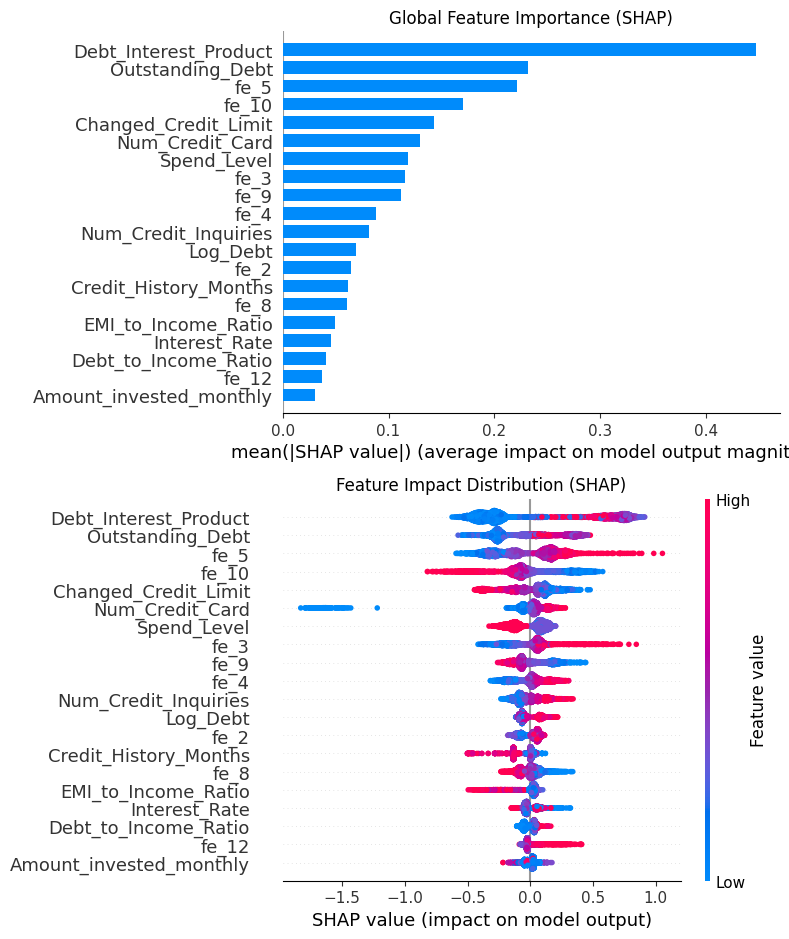

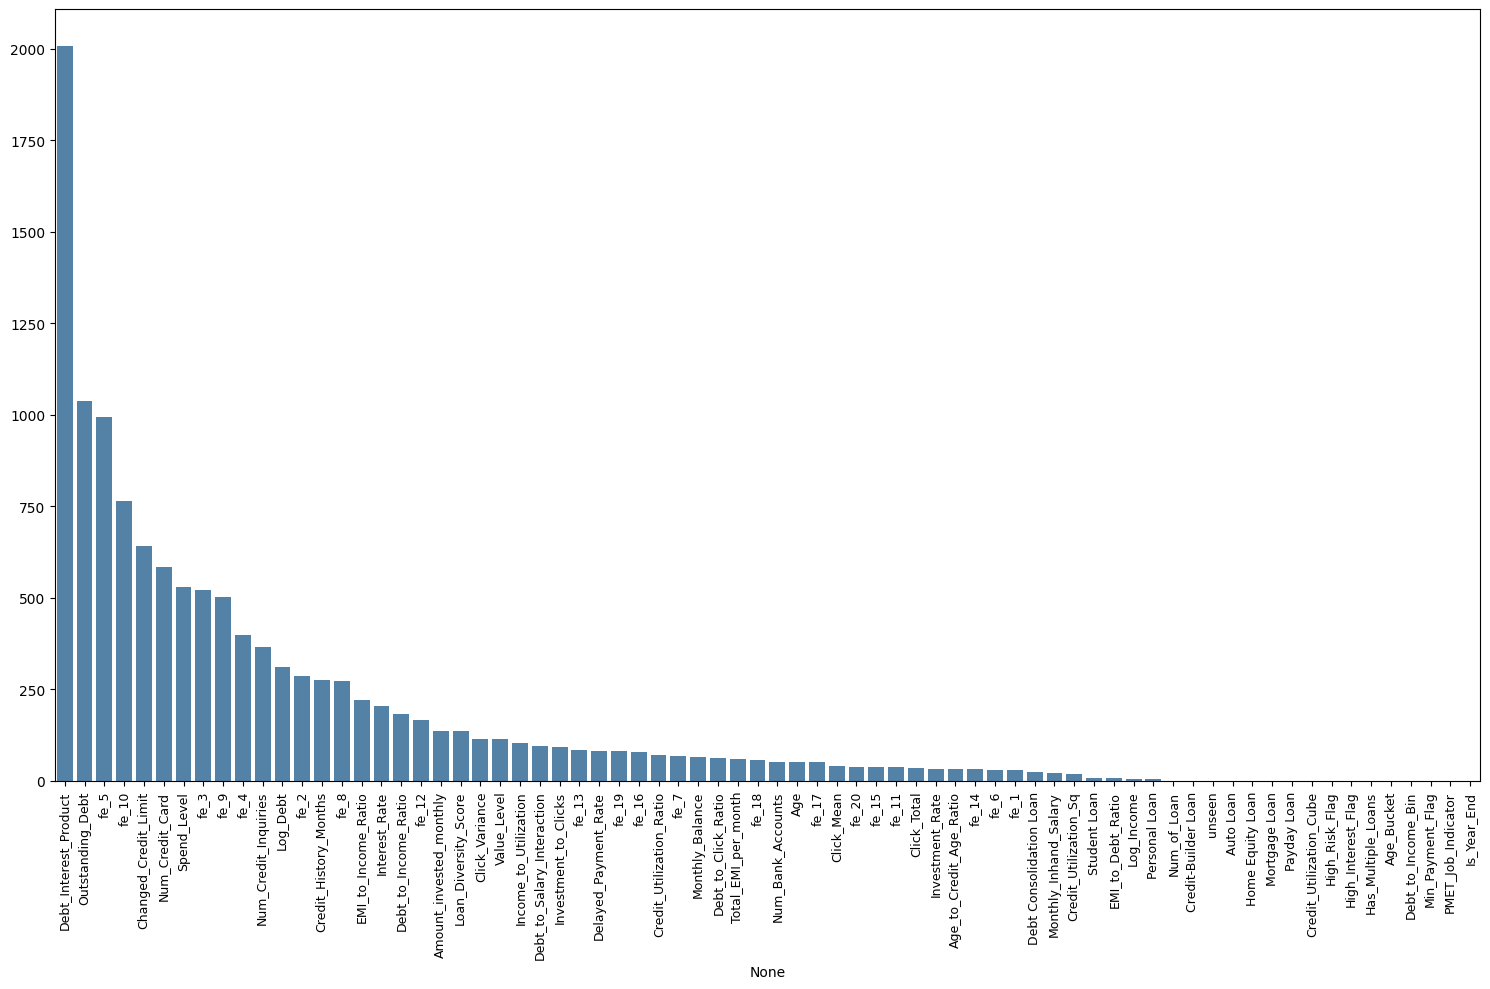

In [83]:
# Initialize SparkSession
spark = pyspark.sql.SparkSession.builder \
    .appName("dev") \
    .master("local[*]") \
    .getOrCreate()

# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

print('Splitting dataset into train, test, OOT')
train, test, oot, sim = train_test_OOT_simulation_months()
gdf = gold_features_labels_snapshot_creation(spark=spark,
                                        gold_features_dir=Path('datamart/gold/feature_store__XGB_v1'),
                                        gold_labels_dir=Path('datamart/gold/label_store'),
                                        snapshots=train)
print('Running first stage of hyperparameter tuning')
X,y = feature_label_XGB_get_X_y(gdf)
study, best_model, model_path, best_model_artifact_uri = optuna_mlflow_hyperparamter_tuning_xgb(X,y,
                                       searchspace_dict={'n_trials':50},
                                       k_folds=5,
                                       save_model_dir='models/testing',
                                       expt_name='5_fold')

print('Running SHAP feature splitting')
feature_set = shap_explainer_feature_set_generator(artifact_uri=best_model_artifact_uri, X=X, y=y)
print('Running second stage hyperparameter tuning')
study, best_model, model_path, best_model_artifact_uri1 = optuna_mlflow_hyperparamter_tuning_xgb(X,y,
                                       searchspace_dict={'n_trials':50},
                                       k_folds=5,
                                       save_model_dir='models/testing',
                                       expt_name='5_fold_feature_select',
                                       feature_set=feature_set)
print('Evaluating on test set')
gdf = gold_features_labels_snapshot_creation(spark=spark,
                                        gold_features_dir=Path('datamart/gold/feature_store__XGB_v1'),
                                        gold_labels_dir=Path('datamart/gold/label_store'),
                                        snapshots=test)
X,y = feature_label_XGB_get_X_y(gdf)
proba = best_model.predict_proba(X)[:,1]
auc_test = roc_auc_score(y, proba)


print('Evaluating on oot set')
gdf = gold_features_labels_snapshot_creation(spark=spark,
                                        gold_features_dir=Path('datamart/gold/feature_store__XGB_v1'),
                                        gold_labels_dir=Path('datamart/gold/label_store'),
                                        snapshots=oot)
X,y = feature_label_XGB_get_X_y(gdf)
proba = best_model.predict_proba(X)[:,1]
auc_oot = roc_auc_score(y, proba)

print(f"cross_fold val AUC: {study.best_value}\n",
      f"test AUC: {auc_test}\n",
      f"OOT AUC: {auc_oot}\n")



In [101]:
print(best_model.get_booster().feature_names)

['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Interest_Rate', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Age', 'Credit_History_Months', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Spend_Level', 'Value_Level', 'Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Payday Loan', 'Personal Loan', 'Student Loan', 'unseen', 'fe_1', 'fe_2', 'fe_3', 'fe_4', 'fe_5', 'fe_6', 'fe_7', 'fe_8', 'fe_9', 'fe_10', 'fe_11', 'fe_12', 'fe_13', 'fe_14', 'fe_15', 'fe_16', 'fe_17', 'fe_18', 'fe_19', 'fe_20', 'Debt_to_Income_Ratio', 'Delayed_Payment_Rate', 'EMI_to_Income_Ratio', 'Investment_Rate', 'Loan_Diversity_Score', 'Click_Total', 'Click_Mean', 'Click_Variance', 'Debt_to_Click_Ratio', 'Income_to_Utilization', 'Investment_to_Clicks', 'Age_to_Credit_Age_Ratio', 'EMI_to_Debt_Ratio', 'Debt_to_Salary_Interaction', 'Debt_Interest_Product', 'Log_Debt'

In [1]:
study

NameError: name 'study' is not defined

/tmp/ipykernel_9/3715145721.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)


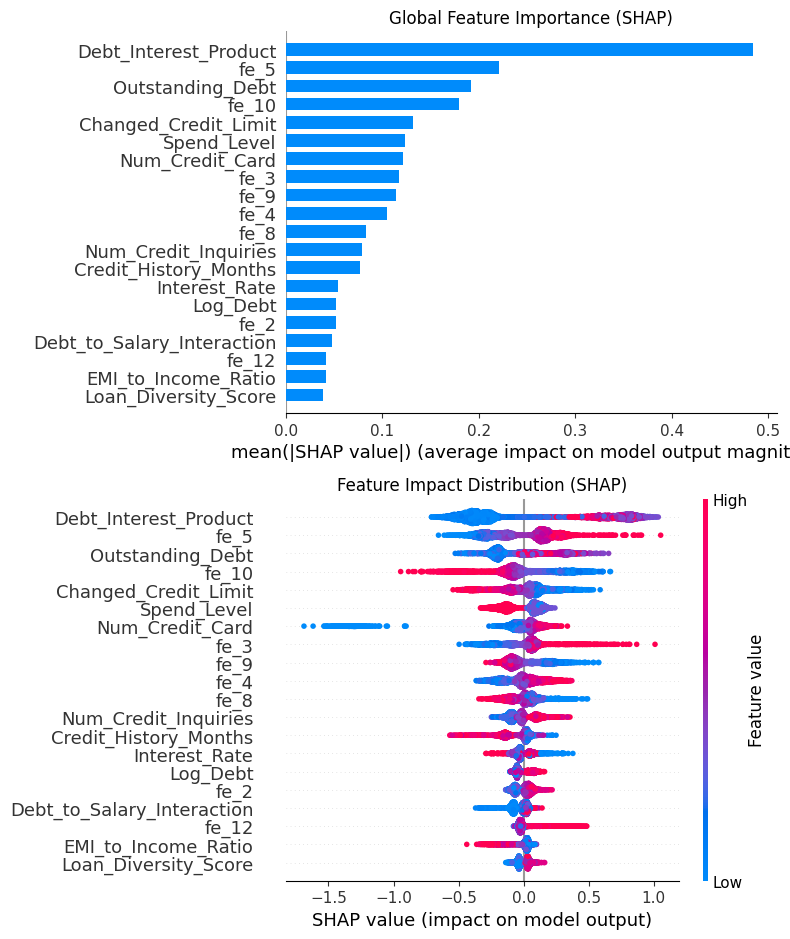

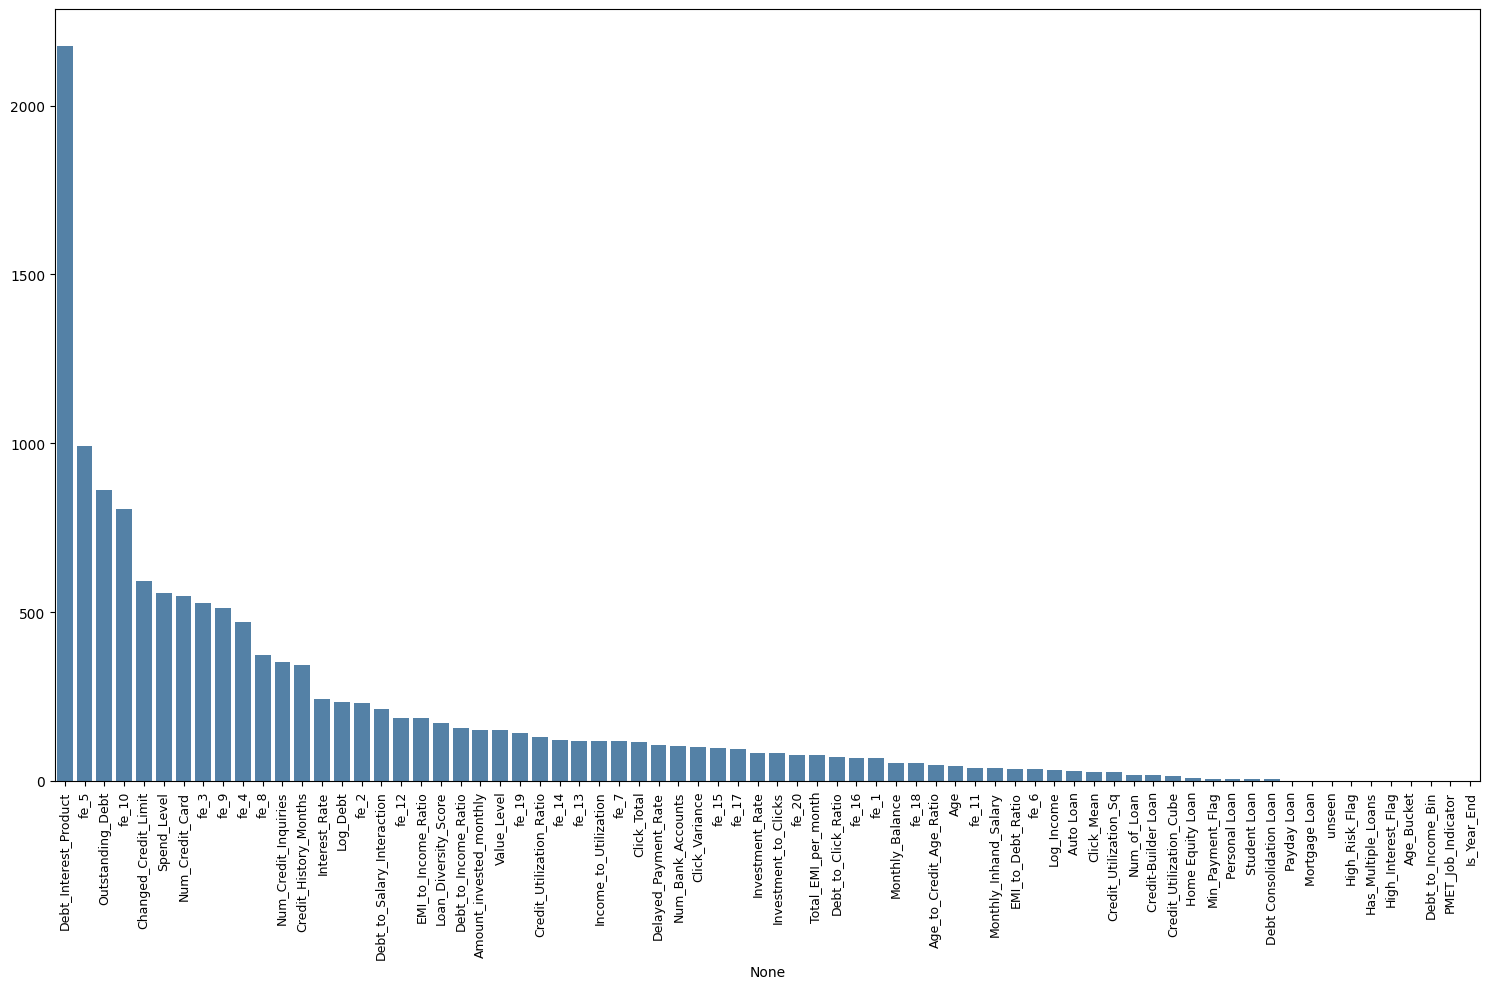

In [117]:
# load best xgb model then run shap feature importance
# plot the feature importance and dataframe for the shap values
import json
from pathlib import Path
import ast
import shap
import mlflow
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# --- configure paths and input data -------------------------------------------------
artifact_uri = (
    './mlruns/260016131701352376/models/m-965ac7cbc530491f98fa7cfa415fd7d5/artifacts'
)
loaded = mlflow.xgboost.load_model(artifact_uri)
booster = loaded if isinstance(loaded, xgb.Booster) else loaded.get_booster()



dmatrix = xgb.DMatrix(X, label=y, enable_categorical=True)

# --- compute SHAP values -----------------------------------------------------------
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(dmatrix)

# --- plot -------------------------------------------------------------------------
fig,axes = plt.subplots(nrows=2, ncols=1)
plt.sca(axes[0])
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
axes[0].set_title("Global Feature Importance (SHAP)")

plt.sca(axes[1])
shap.summary_plot(shap_values, X, show=False)
axes[1].set_title("Feature Impact Distribution (SHAP)")
fig.tight_layout()
fig.show()

shap_df = pd.DataFrame(shap_values, columns=X.columns)
shap_totals = shap_df.abs().sum(axis=0).sort_values(ascending=False)

fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(x=shap_totals.index, y=shap_totals.values, color="steelblue", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
fig.tight_layout()
fig.show()



DROPPING bin 1: 1 features with 0.1616 ---- due to <3 features in group
bin 2: 3 features with 0.2993
bin 3: 4 features with 0.3591
bin 4: 7 features with 0.4849
bin 5: 14 features with 0.6942
bin 6: 32 features with 0.8990
bin 7: 72 features with 1.0000


/tmp/ipykernel_9/1155476314.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)


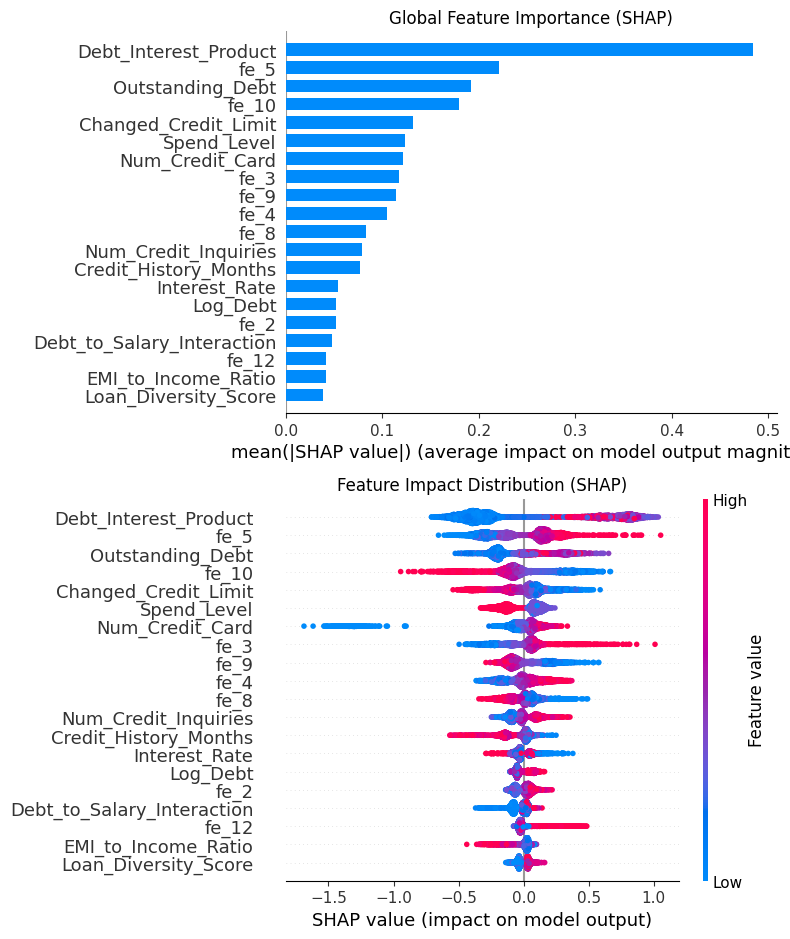

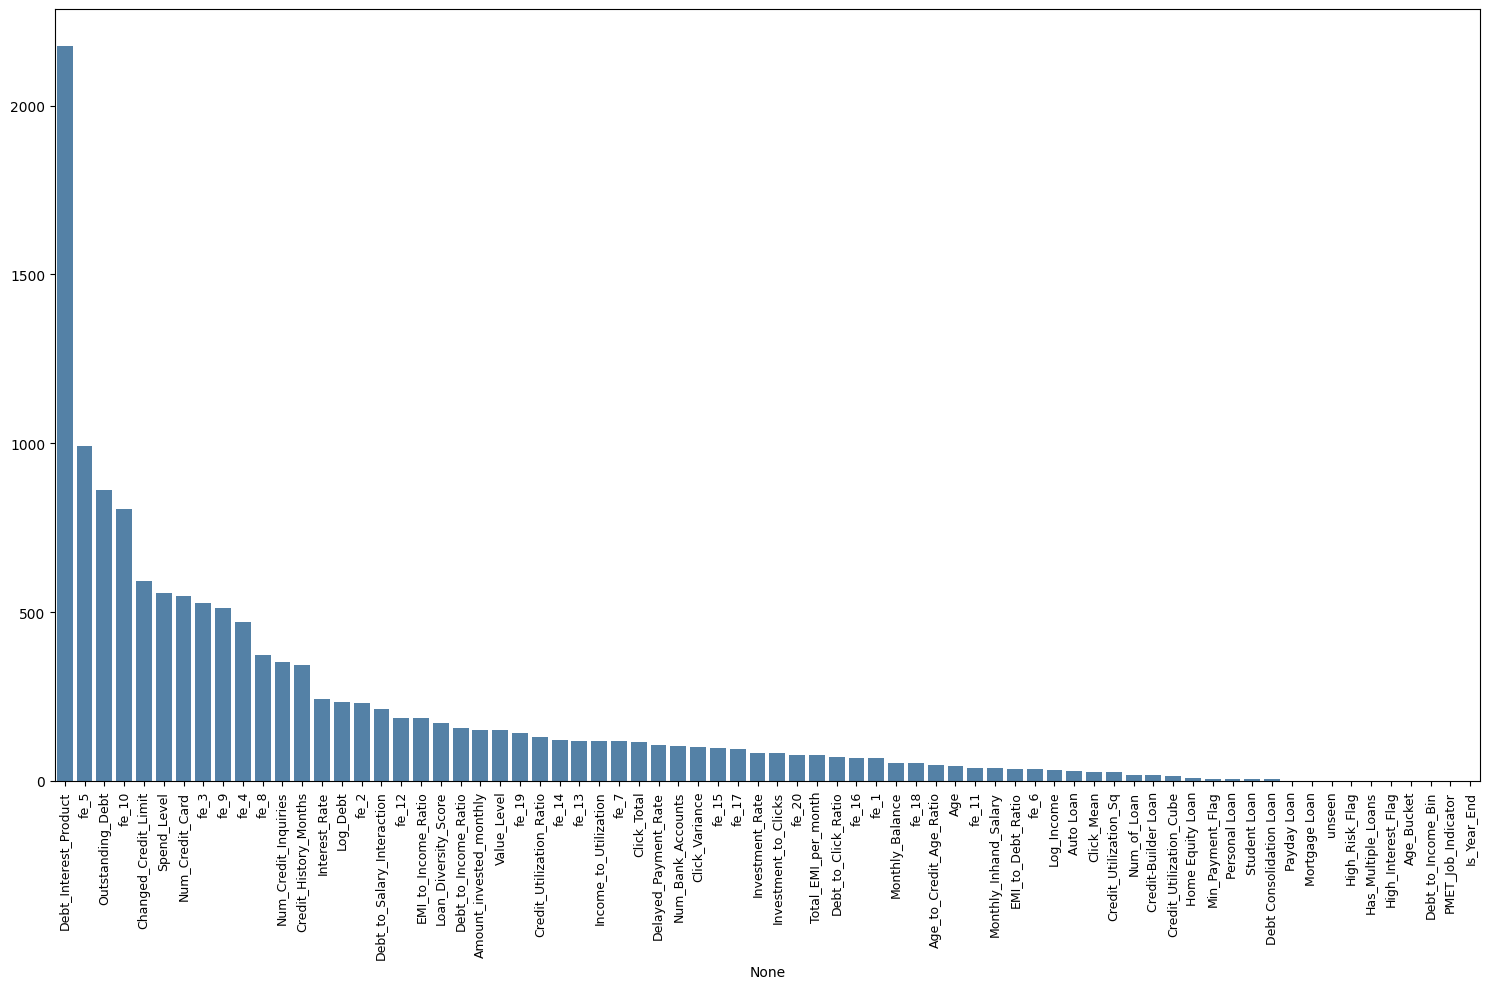

In [93]:
bin_cutting(shap_totals)

DROPPING bin 1: 1 features with 0.1616 ---- due to <3 features in group
bin 2: 3 features with 0.2993
bin 3: 4 features with 0.3591
bin 4: 7 features with 0.4849
bin 5: 14 features with 0.6942
bin 6: 32 features with 0.8990
bin 7: 72 features with 1.0000


{'20–30%': ['Debt_Interest_Product', 'fe_5', 'Outstanding_Debt'],
 '30–40%': ['Debt_Interest_Product', 'fe_5', 'Outstanding_Debt', 'fe_10'],
 '40–50%': ['Debt_Interest_Product',
  'fe_5',
  'Outstanding_Debt',
  'fe_10',
  'Changed_Credit_Limit',
  'Spend_Level',
  'Num_Credit_Card'],
 '50–70%': ['Debt_Interest_Product',
  'fe_5',
  'Outstanding_Debt',
  'fe_10',
  'Changed_Credit_Limit',
  'Spend_Level',
  'Num_Credit_Card',
  'fe_3',
  'fe_9',
  'fe_4',
  'fe_8',
  'Num_Credit_Inquiries',
  'Credit_History_Months',
  'Interest_Rate'],
 '70–90%': ['Debt_Interest_Product',
  'fe_5',
  'Outstanding_Debt',
  'fe_10',
  'Changed_Credit_Limit',
  'Spend_Level',
  'Num_Credit_Card',
  'fe_3',
  'fe_9',
  'fe_4',
  'fe_8',
  'Num_Credit_Inquiries',
  'Credit_History_Months',
  'Interest_Rate',
  'Log_Debt',
  'fe_2',
  'Debt_to_Salary_Interaction',
  'fe_12',
  'EMI_to_Income_Ratio',
  'Loan_Diversity_Score',
  'Debt_to_Income_Ratio',
  'Amount_invested_monthly',
  'Value_Level',
  'fe_19',


In [94]:

knee_from_shap(shap_totals)

(16,
 'Debt_to_Salary_Interaction',
 Index(['Debt_Interest_Product', 'fe_5', 'Outstanding_Debt', 'fe_10',
        'Changed_Credit_Limit', 'Spend_Level', 'Num_Credit_Card', 'fe_3',
        'fe_9', 'fe_4', 'fe_8', 'Num_Credit_Inquiries', 'Credit_History_Months',
        'Interest_Rate', 'Log_Debt', 'fe_2', 'Debt_to_Salary_Interaction'],
       dtype='object'),
 0.7446149587631226)

In [ ]:
import subprocess, sys

ui_proc = subprocess.Popen(
    [
        sys.executable,
        "-m",
        "mlflow",
        "ui",
        "--host", "0.0.0.0",
        "--port", "8888",
        # add these if you really need remote access:
        "--allowed-hosts", "*",
        "--cors-allowed-origins", "*",
    ],
    cwd="mlruns",
)


[MLflow] Security middleware enabled. Allowed hosts: *. CORS origins: *.
ERROR:    [Errno 98] Address already in use


In [ ]:
from pathlib import Path
import pandas as pd

label_store_dir = Path("datamart/gold/label_store")

# Dictionary keyed by file stem -> DataFrame
gold_label_store_frames = {
    file_path.stem: spark.read.parquet(str(file_path)).toPandas()
    for file_path in sorted(label_store_dir.glob("*.parquet"))
}




In [43]:
from pathlib import Path
import pandas as pd

label_store_dir = Path("datamart/silver/loan_daily")

# Dictionary keyed by file stem -> DataFrame
silver_label_store_frames = {
    file_path.stem: spark.read.parquet(str(file_path)).toPandas()
    for file_path in sorted(label_store_dir.glob("*.parquet"))
}




In [50]:
silver_label_store_frames['silver_loan_daily_2023_07_01'].to_csv('./silver_loan_daily_2023_07_01.csv')

In [48]:
gold_label_store_frames['gold_label_store_2023_07_01'].to_csv('./gold_label_store_2023_07_01.csv')

In [35]:
label_store_frames['gold_label_store_2023_07_01'].dtypes

loan_id          object
Customer_ID      object
label             int32
label_def        object
snapshot_date    object
dtype: object

In [41]:
set(label_store_frames['gold_label_store_2023_08_01']['Customer_ID']) & set(label_store_frames['gold_label_store_2023_07_01']['Customer_ID'])

set()